<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='sex', ylabel='survived'>

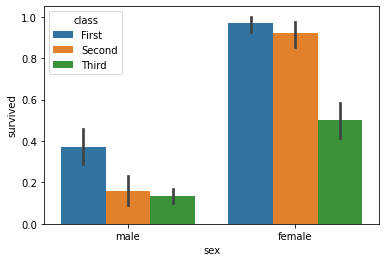

In [1]:
#hw1將每個class中男性和女性的平均存活率用長形圖可視化
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')
df.info()

sns.barplot(x = "sex", y = "survived", hue = "class", data = df) #hue = "class"把性別切分開來

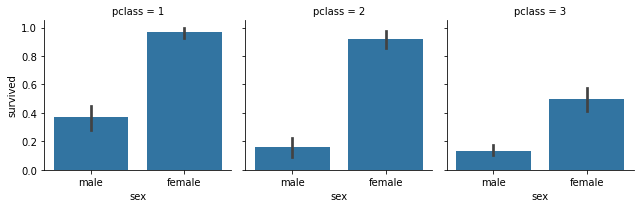

In [2]:
#hw2瞭解性別在各艙等存活率的分布
g = sns.FacetGrid(df, col='pclass')
g.map(sns.barplot, "sex","survived", order=['male','female'])

In [3]:
#hw3繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數
# 先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
# 其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

# df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived
# survived.plot(kind='bar')
#使用crosstab
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

<AxesSubplot:xlabel='pclass,sex'>

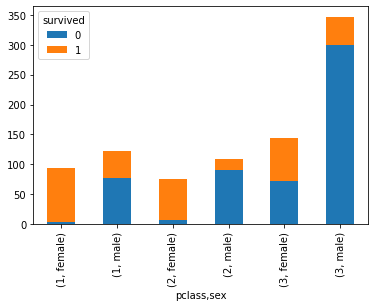

In [4]:
survived_counts.plot.bar(stacked=True) #要設定是True否則不會堆疊起來

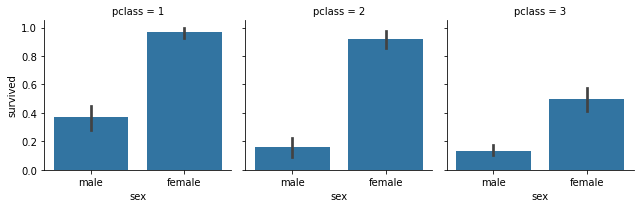

In [5]:
#hw4瞭解性別在各艙等的存活率的分布 (PS: 跟第一次做 Face.Grid 有何不同??)
#這格是第2題的
g = sns.FacetGrid(df, col='pclass')
g.map(sns.barplot,"sex",'survived',order=['male','female'])

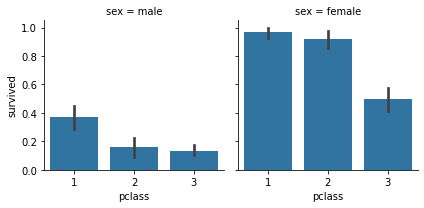

In [6]:
g = sns.FacetGrid(df, col='sex')
g.map(sns.barplot,'pclass','survived',order=[1,2,3])